In [2]:
!pip install -q transformers==4.37.2
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install -q  git+https://github.com/openai/whisper.git
!pip install -q gradio
!pip install -q gTTS


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 77.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 95.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.2.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.37.2 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 16.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━

In [7]:
import torch
from transformers import BitsAndBytesConfig , pipeline


In [4]:
quant_config= BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
)

In [5]:
model_id="llava-hf/llava-1.5-7b-hf"

In [10]:
pipe =pipeline(
    "image-to-text",
    model=model_id,
    model_kwargs={"quantization_config":quant_config}
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

In [11]:
import whisper
import gradio as gr
import time
import warnings
import os
from gtts import gTTS
from PIL import Image

In [15]:
image_path="/content/Screenshot 2024-11-06 133836.png"


In [16]:
image=Image.open((image_path))

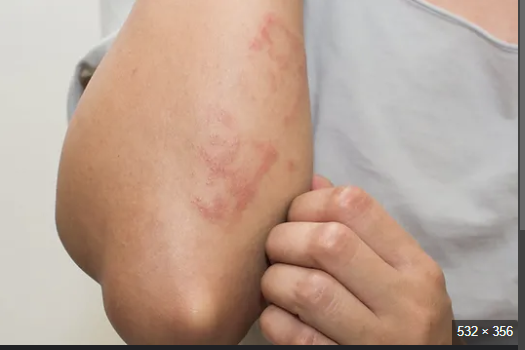

In [17]:
image

In [18]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [19]:
max_new_tokens=250

In [20]:
prompt_instructions="""

Describe the image using as much as detail as possible.
you are a helpful AI assistant who is able to answer questions about images.

what is the image all about?
now generate the helpful answer.

"""

In [21]:
prompt="User: <image>\n" + prompt_instructions + "\nAssistant:"

In [22]:
outputs = pipe(image , prompt=prompt, generate_kwargs={"max_new_tokens":max_new_tokens})

In [23]:
outputs

[{'generated_text': "User:  \n\n\nDescribe the image using as much as detail as possible.\nyou are a helpful AI assistant who is able to answer questions about images.\n\nwhat is the image all about?\nnow generate the helpful answer.\n\n\nAssistant: The image features a person with a skin condition, possibly a skin rash or an itchy skin, on their arm. The person is showing off their arm, which is covered in red marks or bumps. The person's arm is the main focus of the image, and the skin condition appears to be the main subject of the photo."}]

In [24]:
for sent in sent_tokenize(outputs[0]["generated_text"]):
    print(sent)

User:  


Describe the image using as much as detail as possible.
you are a helpful AI assistant who is able to answer questions about images.
what is the image all about?
now generate the helpful answer.
Assistant: The image features a person with a skin condition, possibly a skin rash or an itchy skin, on their arm.
The person is showing off their arm, which is covered in red marks or bumps.
The person's arm is the main focus of the image, and the skin condition appears to be the main subject of the photo.


In [25]:
warnings.filterwarnings("ignore")

In [26]:
import numpy as np

In [27]:
torch.cuda.is_available()

True

In [28]:
DEVICE= "cuda:0" if torch.cuda.is_available() else "cpu"

In [29]:
print(f"using torch {torch.__version__} ({DEVICE})")


using torch 2.5.0+cu121 (cuda:0)


In [30]:
import whisper

In [32]:
model = whisper.load_model("medium" , device= DEVICE)

100%|██████████████████████████████████████| 1.42G/1.42G [00:15<00:00, 101MiB/s]


In [37]:
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(v.shape) for v in model.parameters()):,} parameters."
)

Model is multilingual and has 762,321,920 parameters.


In [42]:
import re
import datetime
import requests
from PIL import Image

In [40]:
##logger file

tstamp= datetime.datetime.now()
tstamp=str(tstamp).replace(" ","_")
logfile=f"  log_{tstamp}.txt"


In [41]:
def writehistory(text):
    with open(logfile,"a" , encoding="utf-8") as f:
        f.write(text)
        f.write("\n")
    f.close()

In [43]:
def img2txt(input_text, input_image):

    # load the image
    image = Image.open(input_image)

    writehistory(f"Input text: {input_text} - Type: {type(input_text)} - Dir: {dir(input_text)}")
    if type(input_text) == tuple:
        prompt_instructions = """
Describe the image using as much as detail as possible.
you are a helpful AI assistant who is able to answer questions about images.

what is the image all about?
now generate the helpful answer.        """
    else:
        prompt_instructions = """
        Act as an expert in imagery descriptive analysis, using as much detail as possible from the image, respond to the following prompt:
        """ + input_text

    writehistory(f"prompt_instructions: {prompt_instructions}")
    prompt = "USER: <image>\n" + prompt_instructions + "\nASSISTANT:"

    outputs = pipe(image, prompt=prompt, generate_kwargs={"max_new_tokens": 200})

    # Properly extract the response text
    if outputs is not None and len(outputs[0]["generated_text"]) > 0:
        match = re.search(r'ASSISTANT:\s*(.*)', outputs[0]["generated_text"])
        if match:
            # Extract the text after "ASSISTANT:"
            reply = match.group(1)
        else:
            reply = "No response found."
    else:
       reply = "No response generated."

    return reply

In [44]:
def transcribe(audio):

    # Check if the audio input is None or empty
    if audio is None or audio == '':
        return ('','',None)  # Return empty strings and None audio file

    # language = 'en'

    audio = whisper.load_audio(audio)
    audio = whisper.pad_or_trim(audio)

    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    _, probs = model.detect_language(mel)

    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    result_text = result.text

    return result_text

In [46]:
def text_to_speech(text, file_path):
    language = 'en'

    audioobj = gTTS(text = text,
                    lang = language,
                    slow = False)

    audioobj.save(file_path)

    return file_path

In [48]:
import locale

In [49]:
print(locale.getlocale())

('en_US', 'UTF-8')


In [50]:
locale.getpreferredencoding = lambda :"UTF-8"

In [51]:
!ffmpeg -f lavfi -i anullsrc=r=44100:cl=mono -t 10 -q:a 9 -acodec libmp3lame Temp.mp3


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import gradio as gr
import base64
import os

# A function to handle audio and image inputs
def process_inputs(audio_path, image_path):
    # Process the audio file (assuming this is handled by a function called 'transcribe')
    speech_to_text_output = transcribe(audio_path)

    # Handle the image input
    if image_path:
        chatgpt_output = img2txt(speech_to_text_output, image_path)
    else:
        chatgpt_output = "No image provided."

    # Assuming 'transcribe' also returns the path to a processed audio file
    processed_audio_path = text_to_speech(chatgpt_output, "Temp3.mp3")  # Replace with actual path if different

    return speech_to_text_output, chatgpt_output, processed_audio_path

# Create the interface
iface = gr.Interface(
    fn=process_inputs,
    inputs=[
        gr.Audio(sources=["microphone"], type="filepath"),
        gr.Image(type="filepath")
    ],
    outputs=[
        gr.Textbox(label="Speech to Text"),
        gr.Textbox(label="AI Output"),
        gr.Audio("Temp.mp3")
    ],
    title="LLM powered voice assistant for multimodal data",
    description="Upload an image and interact via voice input and audio response."
)

# Launch the interface
iface.launch(debug=True)

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://5a51ef71d65f783829.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


ERROR:    Exception in ASGI application
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/protocols/http/h11_impl.py", line 406, in run_asgi
    result = await app(  # type: ignore[func-returns-value]
  File "/usr/local/lib/python3.10/dist-packages/uvicorn/middleware/proxy_headers.py", line 60, in __call__
    return await self.app(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/fastapi/applications.py", line 1054, in __call__
    await super().__call__(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/applications.py", line 113, in __call__
    await self.middleware_stack(scope, receive, send)
  File "/usr/local/lib/python3.10/dist-packages/starlette/middleware/errors.py", line 187, in __call__
    raise exc
  File "/usr/local/lib/python3.10/dist-packages/starlette/middleware/errors.py", line 165, in __call__
    await self.app(scope, receive, _send)
  File "/usr/local/lib/python3.10/dist-pack